# PoinCNN Classification of Raw Lidar Point 

- 🔬 Data Science | AI | ML
- 🥠 Deep Learning
- 🌍 GIS
- ☁️ 3D Point Cloud Classification
- Kevin Muhia Gathogo

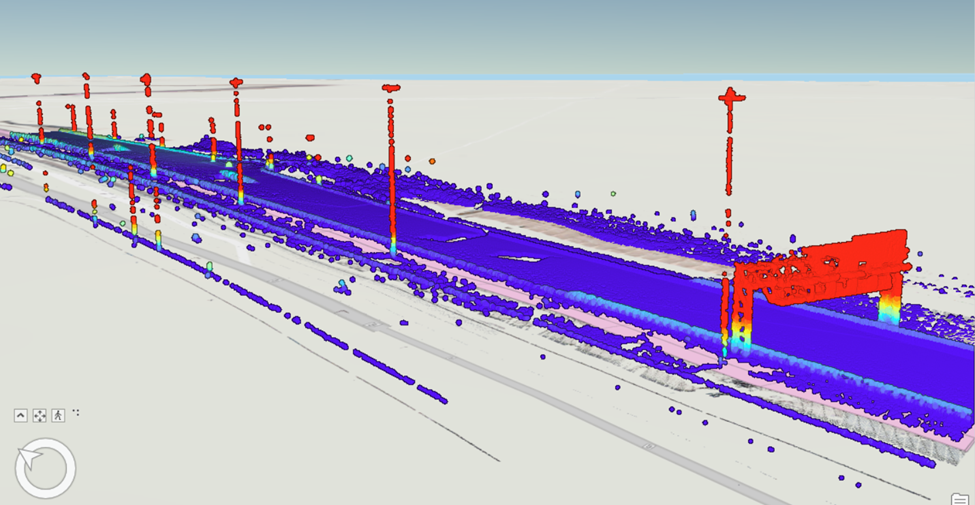

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Area-of-interest-and-pre-processing" data-toc-modified-id="Area-of-interest-and-pre-processing-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Area of interest and pre-processing</a></span></li><li><span><a href="#Data-preparation" data-toc-modified-id="Data-preparation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data preparation</a></span></li><li><span><a href="#Visualization-of-prepared-data" data-toc-modified-id="Visualization-of-prepared-data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Visualization of prepared data</a></span></li><li><span><a href="#Training-the-model" data-toc-modified-id="Training-the-model-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Training the model</a></span></li><li><span><a href="#Visualization-of-results-in-notebook" data-toc-modified-id="Visualization-of-results-in-notebook-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Visualization of results in notebook</a></span></li><li><span><a href="#Saving-the-trained-model" data-toc-modified-id="Saving-the-trained-model-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Saving the trained model</a></span>

## Introduction

Spatial data capturing has evolved with advancement in technology. Use of LiDAR (Light detection and ranging) technology on platform such as aerial(satellites and aircrafts - high altitude), mobile (moving vehicles - on ground) or terrestrial (drone - low altitude) as enable massive data updates and capture. With LiDAR data, classification of point cloud has always been a challenging task due to its naturally unordered data structure. These workflow is for classification of raw mobile point cloud for Al Wakra road - Qatar, pipelined with GIS processes for Road Asset/fetaure extractions.

We first employ the data preparation techniques, to ready the data for deep learning capabilities and finally pipeline it with GIS tools for post processing to vector files.

The following API references will be useful in this exercise <a href="https://developers.arcgis.com/python/api-reference/arcgis.learn.toc.html#pointcnn" target="_blank">API reference</a> for PointCNN (`prepare_data()`, `Transform3d()`, and `PointCNN()`), along with the resources and tool references for point cloud classification using deep learning in ArcGIS Pro, found <a href="https://pro.arcgis.com/en/pro-app/latest/help/data/las-dataset/introduction-to-deep-learning-and-point-clouds.htm" target="_blank">here</a>.

_**Objectives:**_

<ol style="list-style-type:upper-roman">
<li>Classify different road features points using API's PointCNN model, where we train it for  the following Class codes and Class descriptions:</li>
    
    
    - 25: Vehicle Restraint System.
    - 26: Asphalt Edge
    - 27: Guardrail.
    - 26: Curb.
    - 39: Road Markings.
    - 30: Asphalt Channel.  
    
<br>
<li>Generate feature classes from the classified point clouds - Using a GIS Pipeline.</li>
</ol>

## Area of interest and pre-processing

_**Pre-processing steps:**_

LiDAR Preprocessing done using ArcGIS Pro software.

    - Classifying Noise.
    - Rasterizing LiDAR.
    - Digitizing Feature classes.
    - Creating target class or preparing data for training.
    

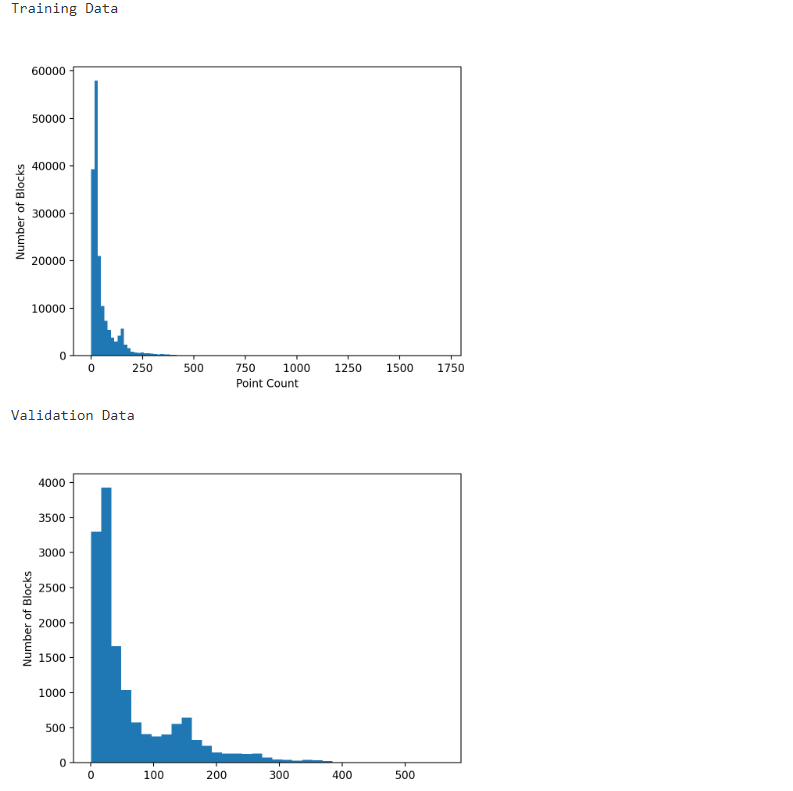

## Data preparation

_**Imports:**_

In [1]:
import os
from arcgis.gis import GIS
from pathlib import Path
from arcgis.learn import prepare_data, Transform3d, PointCNN

import arcgis.learn

_**Exporting the data:**_

- Use of ArcGIS Pro software for exporting the data

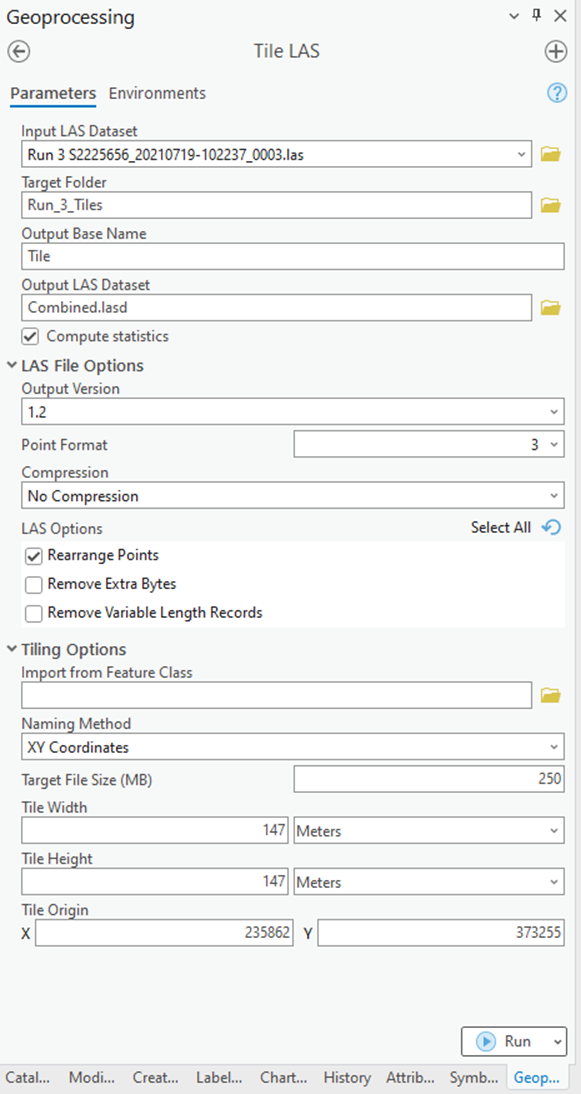 & 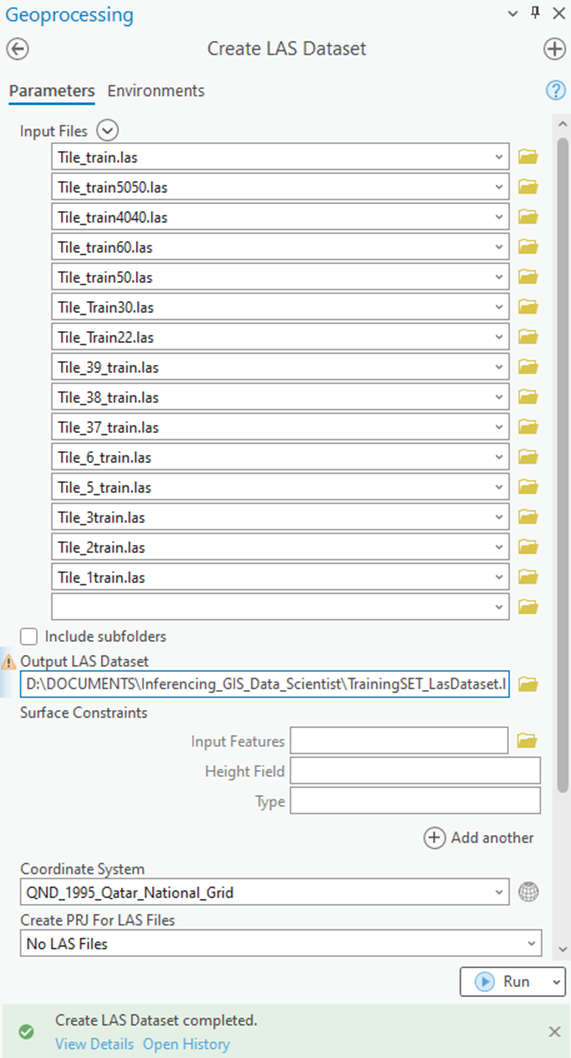 

_**Preparing the data:**_

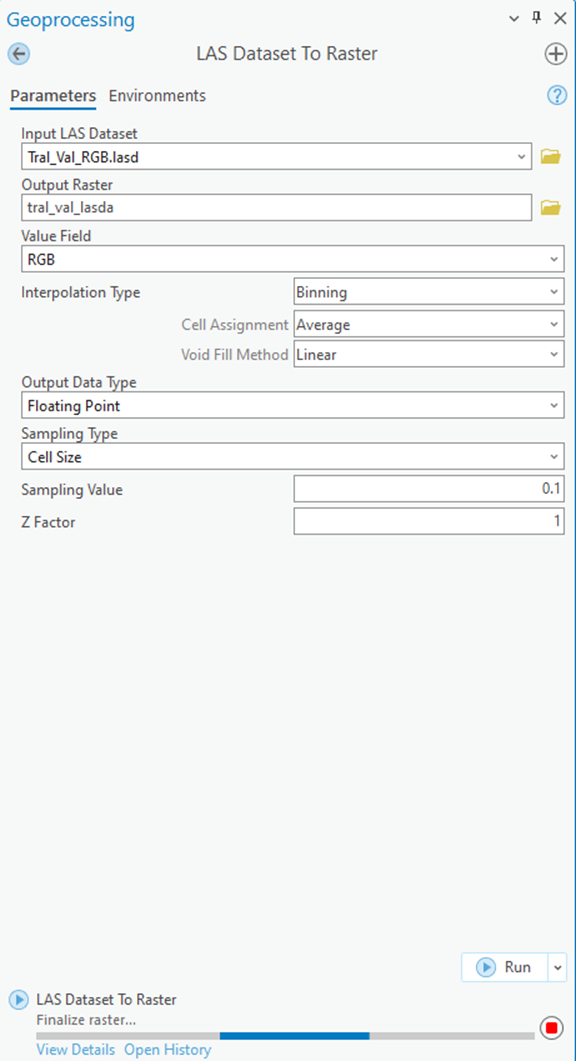 & 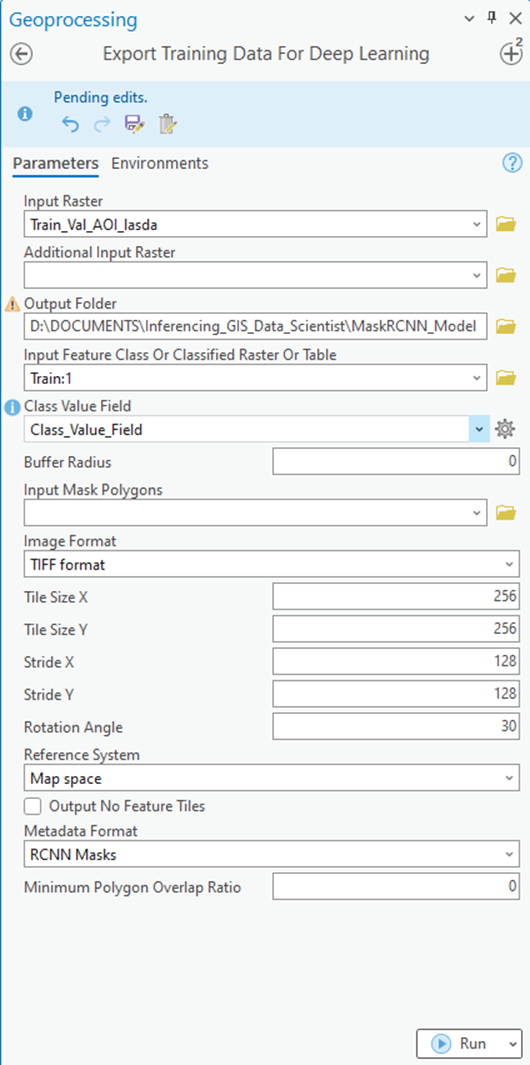

For `prepare_data()`, the value of `batch_size` is chosen based on the available RAM or VRAM, GPU being used. `transforms` for point data wont be affected to avoid losing the shape aspects of point data, X,Y ad Z. `data.classes` used to verify classes in the model being learning.

The `classes_of_interest` and `min_points` parameters are used to filter out less relevant blocks. These parameters are useful when training a model for mobile/terrestrial point clouds. When the 'training data' is not small, usage of these features can result in speeding up the 'training time', improving the convergence during training, and addressing the class imbalance up to some extent.

Here we consider X, Y, Z, and intensity for training the model. So, 'intensity' is selected as `extra_features`. The names of the classes are also defined using `class_mapping` and will be saved inside the model for future reference.

In [2]:
#Vehicular Restarint System and Guardrails
VRS_Gds_data = Path(r'E:/Drive/INNERSPACE/GIS_Data_scientist/GIS_Data_Scientist/training_6_2_24/training_VRS_Gds.pctd')

#Asphalt Edge and Curbs
Asp_Cbs_data = Path(r'E:/Drive/INNERSPACE/GIS_Data_scientist/GIS_Data_Scientist/training_6_2_24/training_Asp_Cbs.pctd')

#Road Markings and Asphalt Carriageway
RdM_AsC_data = Path(r'E:/Drive/INNERSPACE/GIS_Data_scientist/GIS_Data_Scientist/training_6_2_24/training_RdM_AsC.pctd')

In [3]:
VRS_Gds_colormap = {'25':[200,69,10],'27':[155,69,110]}

Asp_Cbs_colormap = {'26':[253,47,183], '28':[253,247,83]}

RdM_AsC_colormap = {'29':[55,69,0], '30':[25,250,223]}

In [4]:
transform = Transform3d(rotation_range=[0.0, math.pi/32., 0.0, 'u'], 
                        scaling_range=[0.0, 0.0, 0.0, 'g'], jitter=0.0)

## Vehicular Restraint System and Guardrail

In [5]:
data = prepare_data(VRS_Gds_data,
                    class_mapping={'25':'Vehicular Restraint System','27':'Guardrails'},
                    dataset_type='PointCloud',
                    transforms=transform,
                    batch_size=10,
                    color_mapping = VRS_Gds_colormap,
                    seed =42,
                    classes_of_interest = [25,27],
                    extra_features=['intensity']
                   )

In [6]:
data.classes

[25, 27]

## Visualization of prepared data

`show_batch()` helps in visualizing the exported data. Navigation tools available in the graph can be used to zoom and pan to the area of interest.

In [7]:
#data.show_batch(rows=4)

<p align="center"><img src="../../static/img/pointcnn_sample1_show_b.gif" /></p>

<center>Figure 3. Visualization of batch.</center>

## Training the model

First, the PointCNN model object is created, utilizing the prepared data.

In [8]:
pc = PointCNN(data)

Next, the `lr_find()` function is used to find the optimal learning rate that controls the rate at which existing information will be overwritten by newly acquired information throughout the training process. If no value is specified, the optimal learning rate will be extracted from the learning curve during the training process.

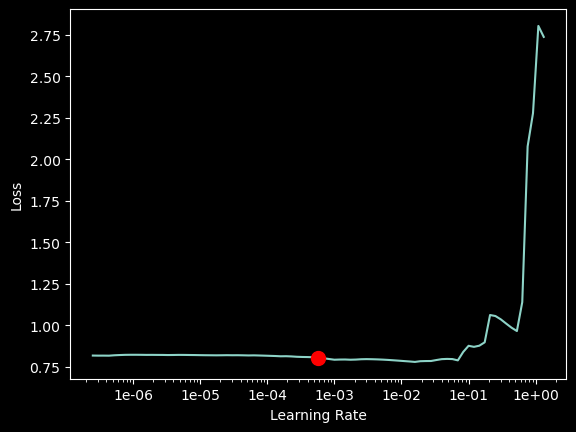

0.0005754399373371565

In [9]:
lr = pc.lr_find(allow_plot=True)
lr

The `fit()` method is used to train the model, either applying a new 'optimum learning rate' or the previously computed 'optimum learning rate'.

`early_stopping` is set to 'True', then the model training will stop when the model is no longer improving, regardless of the `epochs` parameter value specified. The best model is selected based on the metric selected in the `monitor` parameter. A list of `monitor`'s available metrics are generated using the `available_metrics` property.

An 'epoch' means the dataset will be passed forward and backward through the neural network one time, and if `Iters_per_epoch` is used, a subset of data is passed per epoch. To track information like gradients, losses, metrics, etc. while the model training is in progress, `tensorboard` is set to 'True'.


In [10]:
pc.available_metrics

['valid_loss', 'accuracy', 'precision', 'recall', 'f1']

In [11]:
pc.fit(epochs =50, 
       lr = lr, 
       monitor='f1',
       tensorboard=True,
       checkpoint=True,
       early_stopping=True)

Monitor training on Tensorboard using the following command: 'tensorboard --host=ESD-KEGATHOGO --logdir="E:\Drive\INNERSPACE\GIS_Data_scientist\GIS_Data_Scientist\training_6_2_24\training_VRS_Gds.pctd\training_log"'
epoch     train_loss  valid_loss  accuracy  precision  recall    f1        time    
0         0.758042    0.598461    0.688412  0.543990   0.481195  0.491105  09:57     
1         0.728950    0.542215    0.775301  0.572753   0.536374  0.529942  09:43     
2         0.703277    0.516667    0.815837  0.587972   0.559172  0.546575  09:42     
3         0.683761    0.510956    0.823800  0.589781   0.559383  0.534105  09:42     
4         0.674174    0.476476    0.841088  0.604781   0.572506  0.544966  09:42     
5         0.670638    0.444017    0.841999  0.613148   0.572901  0.547905  09:41     
6         0.668991    0.446659    0.823070  0.599422   0.561024  0.530847  09:41     
7         0.669074    0.452256    0.818772  0.610111   0.557983  0.527470  09:41     
8         0.

## Visualization of results in notebook

`show_results()` visualizes the results of the model for the same scene as the ground truth. Navigation tools available in the graph are used to zoom and pan to the area of interest.

The `compute_precision_recall()` method is used to compute per-class performance metrics, which are calculated against the validation dataset.

<p align="center"><img src="../../static/img/pointcnn_sample1_show_r.gif" /></p>

<center>Figure 4. Visualization of results.</center>

In [13]:
pc.compute_precision_recall()

,Vehicular Restraint System,Guardrails
precision,0.902056,0.877490
recall,0.703887,0.965219
f1_score,0.790745,0.919266


## Saving the trained model

To save the model, the `save()` method is used. Along with the model files, this method also saves performance metrics, a graph of training loss vs validation loss, sample results, etc.

In [14]:
pc.save('PointCNNmodel_VRS_Gds_11')

Computing model metrics...


WindowsPath('E:/Drive/INNERSPACE/GIS_Data_scientist/GIS_Data_Scientist/training_6_2_24/training_VRS_Gds.pctd/models/PointCNNmodel_VRS_Gds_11')

In [12]:
#pc.show_results(rows=4)

## Asphalt Edge and Curbs

In [15]:
data = prepare_data(Asp_Cbs_data,                    
                    class_mapping={'26':'Asphalt Edge','28':'Curbs'},
                    dataset_type='PointCloud',
                    batch_size=10,
                    transforms=transform,
                    color_mapping = Asp_Cbs_colormap,
                    seed =42,
                    classes_of_interest = [26,28],
                    extra_features=['intensity']
                   )

In [16]:
pc = PointCNN(data)

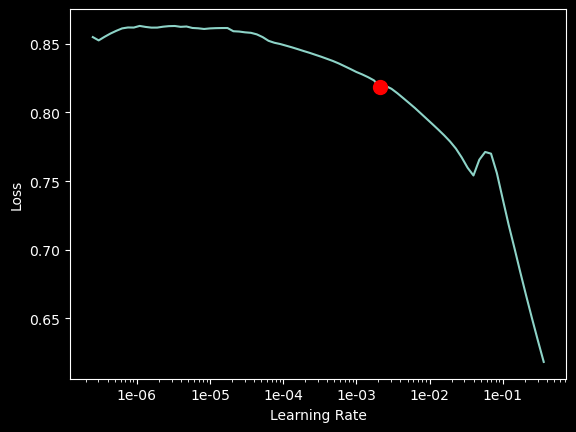

0.0020892961308540407

In [17]:
lr = pc.lr_find(allow_plot=True)
lr

In [18]:
pc.available_metrics

['valid_loss', 'accuracy', 'precision', 'recall', 'f1']

In [19]:
pc.fit(epochs =50, 
       lr = lr, 
       monitor='f1',
       tensorboard=True, 
       checkpoint=True,
       early_stopping=True)

Monitor training on Tensorboard using the following command: 'tensorboard --host=ESD-KEGATHOGO --logdir="E:\Drive\INNERSPACE\GIS_Data_scientist\GIS_Data_Scientist\training_6_2_24\training_Asp_Cbs.pctd\training_log"'
epoch     train_loss  valid_loss  accuracy  precision  recall    f1        time    
0         0.674237    0.649855    0.729513  0.584349   0.526703  0.531073  14:53     
1         0.578268    0.533163    0.798695  0.570729   0.475439  0.430447  14:44     
2         0.490855    0.433118    0.798964  0.642518   0.540467  0.492978  14:44     
3         0.460619    0.405370    0.798878  0.575632   0.474719  0.428372  14:44     
4         0.446415    0.439652    0.796872  0.552238   0.476072  0.435556  14:44     
5         0.441796    0.515532    0.798184  0.593679   0.487096  0.438693  14:44     
6         0.436169    0.422272    0.800843  0.573337   0.481002  0.444179  14:44     
Epoch 6: early stopping


In [20]:
pc.compute_precision_recall()

,Asphalt Edge,Curbs
precision,0.397482,0.909461
recall,0.714332,0.726034
f1_score,0.510759,0.807461


In [21]:
pc.save('PointCNNmodel_Asp_Cbs_11')

Computing model metrics...


WindowsPath('E:/Drive/INNERSPACE/GIS_Data_scientist/GIS_Data_Scientist/training_6_2_24/training_Asp_Cbs.pctd/models/PointCNNmodel_Asp_Cbs_11')

In [22]:
#pc.show_results(rows=4)

## Asphalt Channel and Road Markings

In [23]:
data = prepare_data(RdM_AsC_data,                    
                    class_mapping={'29':'Road Marking','30':'Asphalt Carriageway'},
                    dataset_type='PointCloud',
                    transforms=transform,
                    batch_size=10,
                    color_mapping = RdM_AsC_colormap,
                    seed =42,
                    classes_of_interest = [29,30],
                    extra_features=['intensity']
                   )

In [24]:
data.classes

[29, 30]

In [25]:
pc = PointCNN(data)

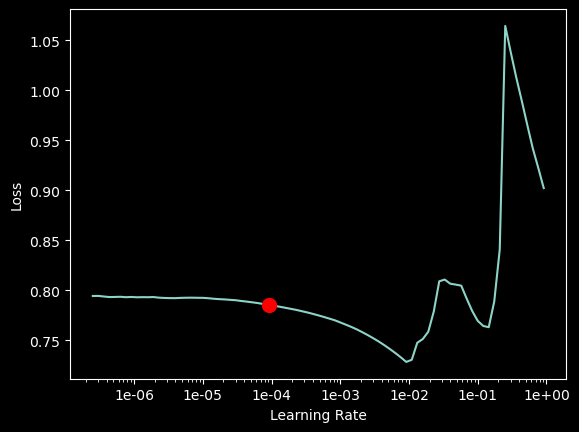

9.120108393559096e-05

In [26]:
lr = pc.lr_find(allow_plot=True)
lr

In [27]:
pc.available_metrics

['valid_loss', 'accuracy', 'precision', 'recall', 'f1']

In [28]:
pc.fit(epochs =50, 
       lr = lr, 
       monitor='f1',
       tensorboard=True, 
       checkpoint=True,
       early_stopping=True)

Monitor training on Tensorboard using the following command: 'tensorboard --host=ESD-KEGATHOGO --logdir="E:\Drive\INNERSPACE\GIS_Data_scientist\GIS_Data_Scientist\training_6_2_24\training_RdM_AsC.pctd\training_log"'
epoch     train_loss  valid_loss  accuracy  precision  recall    f1        time    
0         0.759441    0.617247    0.758012  0.518203   0.448442  0.440010  46:33     
1         0.735893    0.774329    0.656873  0.524038   0.416689  0.399241  45:59     
2         0.715903    1.016002    0.555941  0.525385   0.373821  0.335731  46:05     
3         0.702902    1.157266    0.498604  0.526170   0.350974  0.284731  46:56     
4         0.697058    1.313267    0.486050  0.462854   0.362269  0.283112  46:22     
5         0.694724    1.365726    0.485411  0.461329   0.418614  0.336689  46:40     
6         0.694275    1.336982    0.485512  0.444538   0.418696  0.336656  47:48     
Epoch 6: early stopping


In [29]:
pc.save('PointCNNmodel_RdM_AsC_11')

Computing model metrics...


WindowsPath('E:/Drive/INNERSPACE/GIS_Data_scientist/GIS_Data_Scientist/training_6_2_24/training_RdM_AsC.pctd/models/PointCNNmodel_RdM_AsC_11')

In [30]:
#pc.show_results(rows=4)

In [31]:
pc.compute_precision_recall()

,Road Marking,Asphalt Carriageway
precision,0.680141,0.919590
recall,0.946281,0.579919
f1_score,0.791436,0.711283


# END